In [1]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import tfim_sk_infd.services.entropy_service as tfe
import json

DB_PATH = 'database/fair_sampling.db'

In [2]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	seed,
	od_variance,
	post_anneal_od_variance,
	qfi_fair_sampling,
	qfi_post_anneal,
    full_gs_od_variance,
	full_gs_post_anneal_od_variance,
	full_gs_qfi_fair_sampling,
	full_gs_qfi_post_anneal
FROM
	instances_N16
WHERE degeneracy > 2;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [3]:
df

,seed,od_variance,post_anneal_od_variance,qfi_fair_sampling,qfi_post_anneal,full_gs_od_variance,full_gs_post_anneal_od_variance,full_gs_qfi_fair_sampling,full_gs_qfi_post_anneal
0,6,0.013889,1.393923e-02,0.013889,0.014650,0.708333,0.709233,0.708333,0.726605
1,9,0.015625,1.561641e-02,0.015625,0.015378,0.781250,0.784483,0.781250,0.808834
2,10,0.015625,1.562127e-02,0.015625,0.015615,0.781250,0.781203,0.781250,0.786830
3,11,0.015625,1.560984e-02,0.015625,0.015206,0.781250,0.786921,0.781250,0.817108
4,13,0.062500,1.019535e-08,0.062500,0.000012,0.625000,0.999901,0.625000,1.000000
...,...,...,...,...,...,...,...,...,...
640,1987,0.013889,1.402990e-02,0.013889,0.015022,0.708333,0.711194,0.708333,0.738273
641,1992,0.250000,3.273035e-08,0.250000,0.000090,0.500000,0.999819,0.500000,1.000000
642,1993,0.062500,1.202869e-06,0.062500,0.000018,0.625000,0.999857,0.625000,0.999998
643,1997,0.070400,1.790114e-02,0.085000,0.021043,0.480000,0.667169,0.550000,0.725223


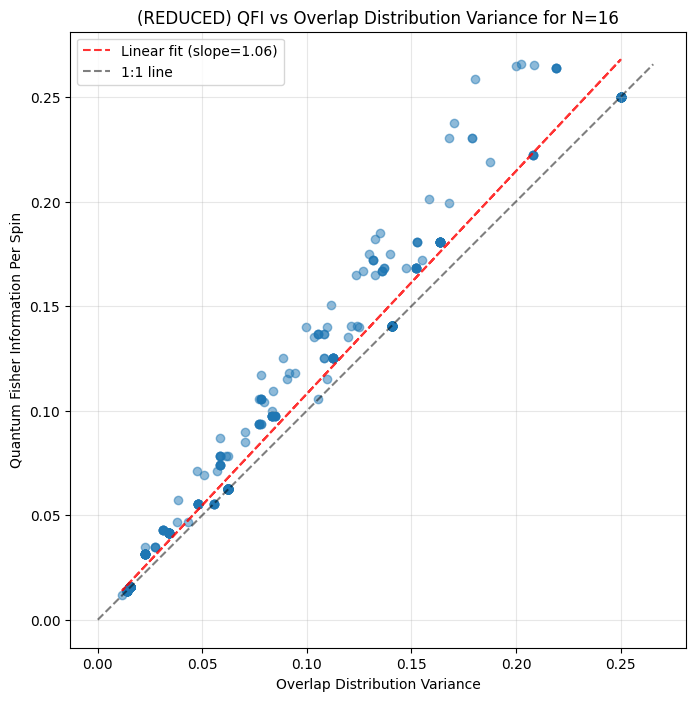

In [24]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['od_variance'], df['qfi_fair_sampling'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['od_variance'], df['qfi_fair_sampling'], 1)
p = np.poly1d(z)
plt.plot(df['od_variance'], p(df['od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['od_variance'].max(), df['qfi_fair_sampling'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Overlap Distribution Variance')
plt.ylabel('Quantum Fisher Information Per Spin')
plt.title('(REDUCED) QFI vs Overlap Distribution Variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

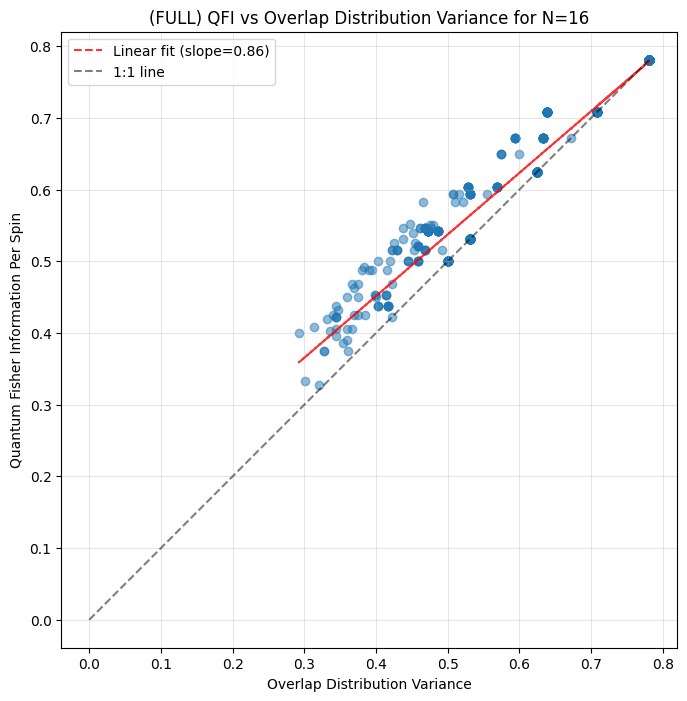

In [26]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['full_gs_od_variance'], df['full_gs_qfi_fair_sampling'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['full_gs_od_variance'], df['full_gs_qfi_fair_sampling'], 1)
p = np.poly1d(z)
plt.plot(df['full_gs_od_variance'], p(df['full_gs_od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['full_gs_od_variance'].max(), df['full_gs_qfi_fair_sampling'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Overlap Distribution Variance')
plt.ylabel('Quantum Fisher Information Per Spin')
plt.title('(FULL) QFI vs Overlap Distribution Variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

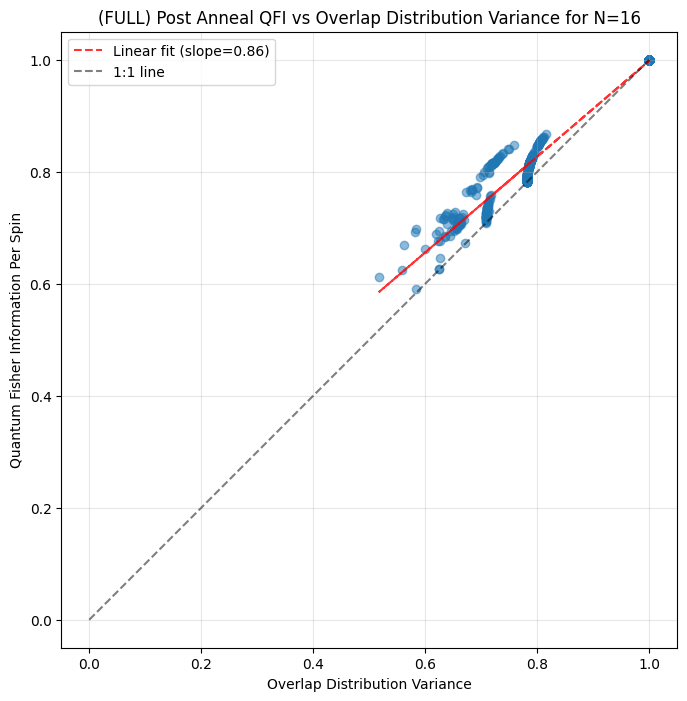

In [35]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['full_gs_post_anneal_od_variance'], df['full_gs_qfi_post_anneal'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['full_gs_post_anneal_od_variance'], df['full_gs_qfi_post_anneal'], 1)
p = np.poly1d(z)
plt.plot(df['full_gs_post_anneal_od_variance'], p(df['full_gs_post_anneal_od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['full_gs_post_anneal_od_variance'].max(), df['full_gs_qfi_post_anneal'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Overlap Distribution Variance')
plt.ylabel('Quantum Fisher Information Per Spin')
plt.title('(FULL) Post Anneal QFI vs Overlap Distribution Variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

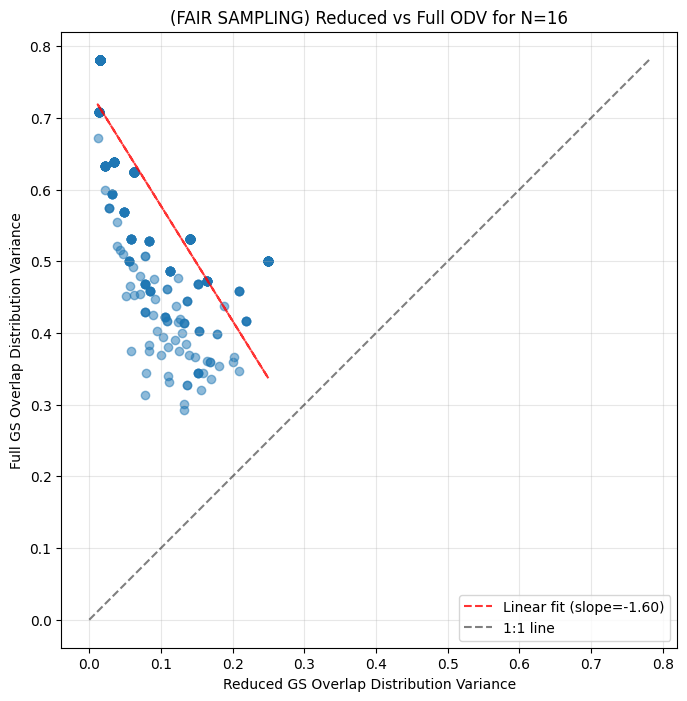

In [21]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['od_variance'], df['full_gs_od_variance'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['od_variance'], df['full_gs_od_variance'], 1)
p = np.poly1d(z)
plt.plot(df['od_variance'], p(df['od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['od_variance'].max(), df['full_gs_od_variance'].max())
plt.plot([0, max_val], [ 0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Reduced GS Overlap Distribution Variance')
plt.ylabel('Full GS Overlap Distribution Variance')
plt.title('(FAIR SAMPLING) Reduced vs Full ODV for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

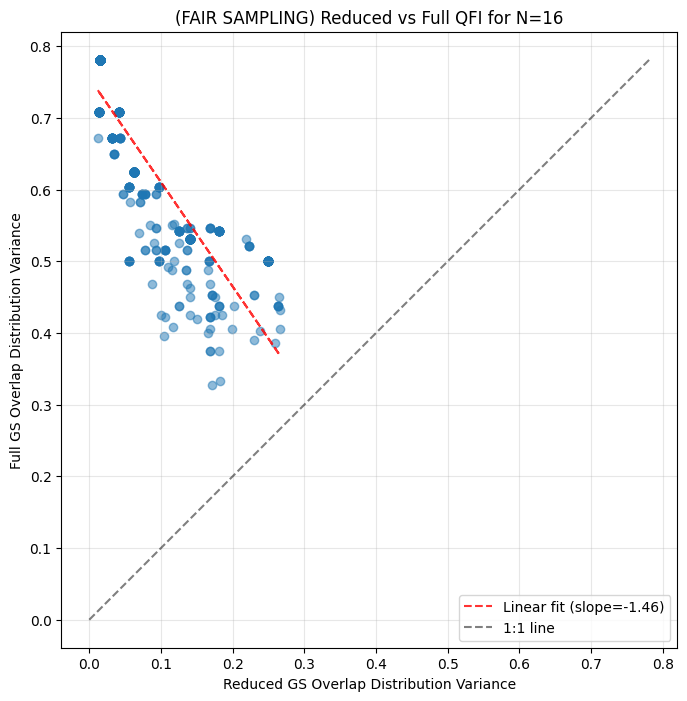

In [27]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['qfi_fair_sampling'], df['full_gs_qfi_fair_sampling'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['qfi_fair_sampling'], df['full_gs_qfi_fair_sampling'], 1)
p = np.poly1d(z)
plt.plot(df['qfi_fair_sampling'], p(df['qfi_fair_sampling']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['qfi_fair_sampling'].max(), df['full_gs_qfi_fair_sampling'].max())
plt.plot([0, max_val], [ 0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Reduced GS Overlap Distribution Variance')
plt.ylabel('Full GS Overlap Distribution Variance')
plt.title('(FAIR SAMPLING) Reduced vs Full QFI for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

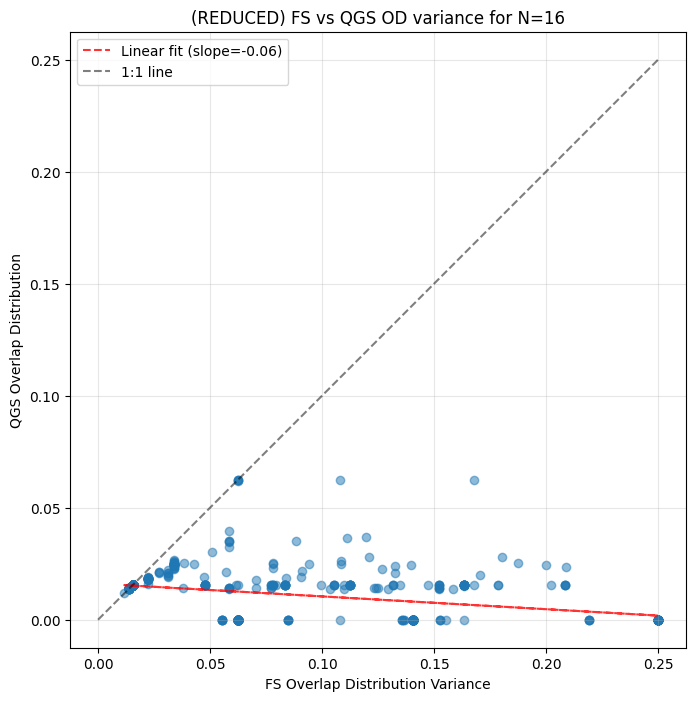

In [29]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['od_variance'], df['post_anneal_od_variance'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['od_variance'], df['post_anneal_od_variance'], 1)
p = np.poly1d(z)
plt.plot(df['od_variance'], p(df['od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['od_variance'].max(), df['post_anneal_od_variance'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('FS Overlap Distribution Variance')
plt.ylabel('QGS Overlap Distribution')
plt.title('(REDUCED) FS vs QGS OD variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

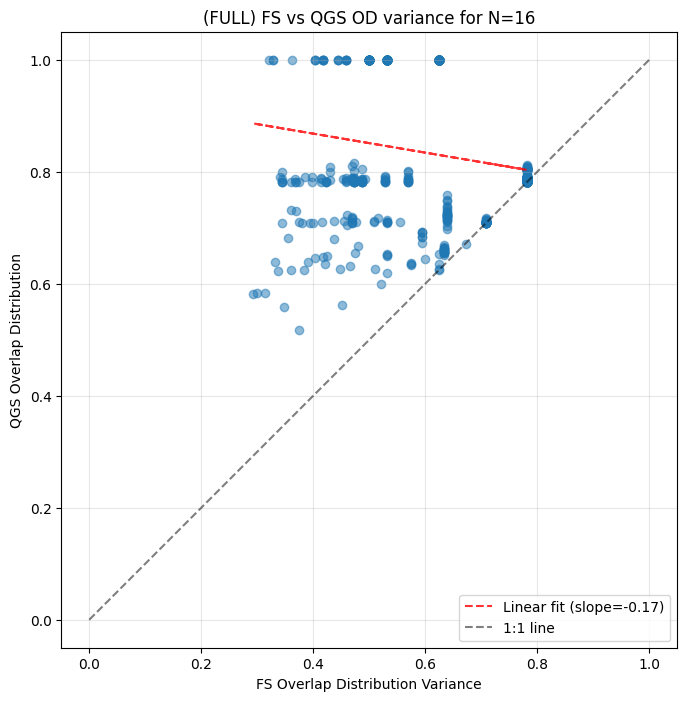

In [30]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['full_gs_od_variance'], df['full_gs_post_anneal_od_variance'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['full_gs_od_variance'], df['full_gs_post_anneal_od_variance'], 1)
p = np.poly1d(z)
plt.plot(df['full_gs_od_variance'], p(df['full_gs_od_variance']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['full_gs_od_variance'].max(), df['full_gs_post_anneal_od_variance'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('FS Overlap Distribution Variance')
plt.ylabel('QGS Overlap Distribution')
plt.title('(FULL) FS vs QGS OD variance for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

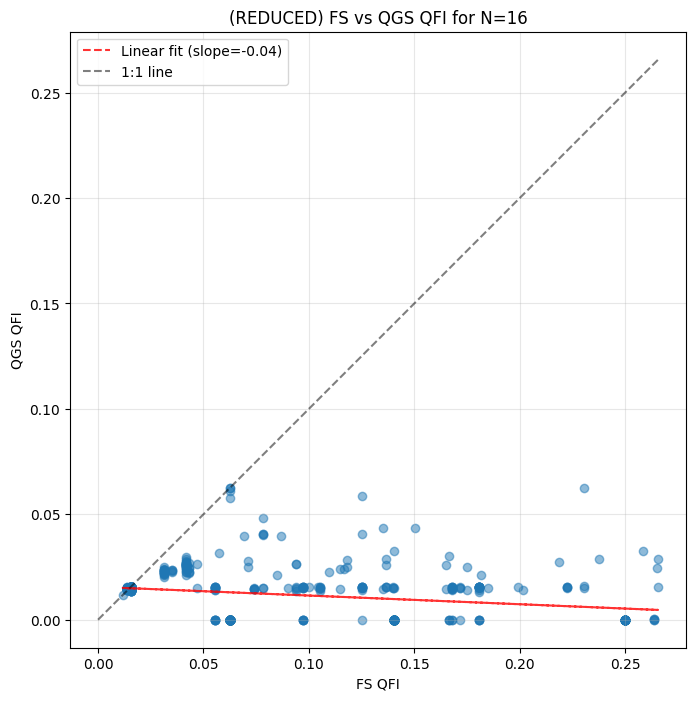

In [31]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['qfi_fair_sampling'], df['qfi_post_anneal'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['qfi_fair_sampling'], df['qfi_post_anneal'], 1)
p = np.poly1d(z)
plt.plot(df['qfi_fair_sampling'], p(df['qfi_fair_sampling']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['qfi_fair_sampling'].max(), df['qfi_post_anneal'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('FS QFI')
plt.ylabel('QGS QFI')
plt.title('(REDUCED) FS vs QGS QFI for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

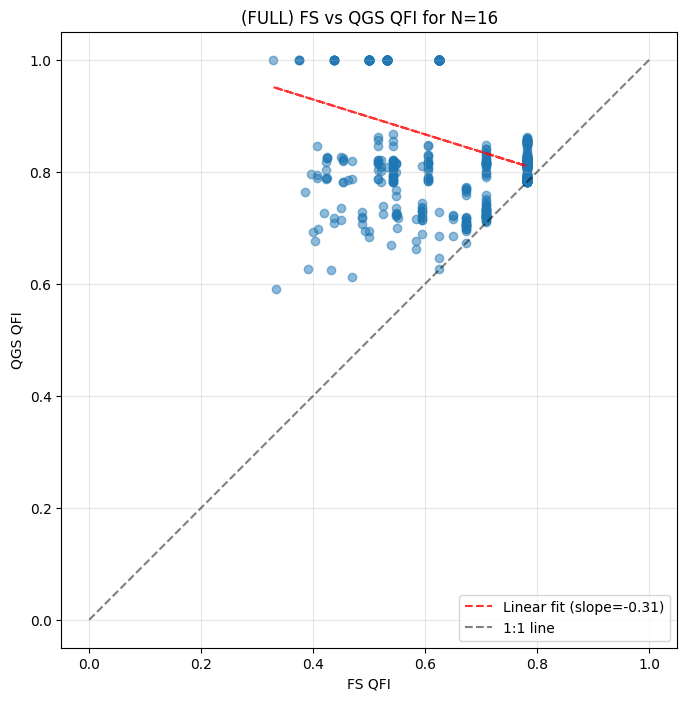

In [32]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['full_gs_qfi_fair_sampling'], df['full_gs_qfi_post_anneal'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['full_gs_qfi_fair_sampling'], df['full_gs_qfi_post_anneal'], 1)
p = np.poly1d(z)
plt.plot(df['full_gs_qfi_fair_sampling'], p(df['full_gs_qfi_fair_sampling']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['full_gs_qfi_fair_sampling'].max(), df['full_gs_qfi_post_anneal'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('FS QFI')
plt.ylabel('QGS QFI')
plt.title('(FULL) FS vs QGS QFI for N=16')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

In [33]:
CTRL A + D

screen -r

SyntaxError: invalid syntax (222739076.py, line 1)